In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

#Import CSVs and Merge to single dataset 
mouse_drug_data = pd.read_csv('../GRADE_THIS/Pymaceuticals/data/mouse_drug_data.csv')
clinical_trial_data = pd.read_csv('../GRADE_THIS/Pymaceuticals/data/clinicaltrial_data.csv')

# Combine the data into a single dataset
mouse_trial_combined = pd.merge(clinical_trial_data, mouse_drug_data, how="left", on=["Mouse ID", "Mouse ID"])
mouse_trial_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_tumor = mouse_trial_combined.groupby(["Drug","Timepoint"]) ["Tumor Volume (mm3)"]
avg_tumor = grouped_tumor.mean()

# Convert to DataFrame
avg_tumor_df = pd.DataFrame(avg_tumor)
avg_tumor_df = avg_tumor_df.reset_index()
# Preview DataFrame
avg_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
st_err_tumor = grouped_tumor.sem()

# Convert to DataFrame
st_err_tumor_df = pd.DataFrame(st_err_tumor)
st_err_tumor_df = st_err_tumor_df.reset_index()

# Preview DataFrame
st_err_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
change_avg_tumor = avg_tumor_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Preview that Reformatting worked
change_avg_tumor.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


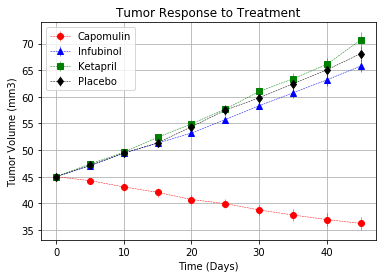

In [5]:
# Generate the Plot (with Error Bars)

plt.errorbar(change_avg_tumor.index, change_avg_tumor["Capomulin"],yerr=st_err_tumor["Capomulin"],label = "Capomulin", marker="o", color="red",ls='--',
                 linewidth=0.5)
plt.errorbar(change_avg_tumor.index, change_avg_tumor["Infubinol"],yerr=st_err_tumor["Infubinol"],label = "Infubinol", marker="^", color="blue",ls='--',
                 linewidth=0.5)
plt.errorbar(change_avg_tumor.index, change_avg_tumor["Ketapril"],yerr=st_err_tumor["Ketapril"],label = "Ketapril", marker="s", color="green",ls='--',
                 linewidth=0.5)
plt.errorbar(change_avg_tumor.index, change_avg_tumor["Placebo"],yerr=st_err_tumor["Placebo"],label = "Placebo", marker="d", color="black",ls='--',
                 linewidth=0.5)
    
plt.legend(loc='best')
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)

# Save the Figure
plt.savefig("../GRADE_THIS/tumor_response.png")
# Show the Figure
plt.show()


## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_met = mouse_trial_combined.groupby(["Drug","Timepoint"]) ["Metastatic Sites"]
avg_met = grouped_met.mean()

# Convert to DataFrame
avg_met_df= pd.DataFrame(avg_met)
avg_met_df = avg_met_df.reset_index()

# Preview DataFrame
avg_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
st_err_met = grouped_met.sem()

# Convert to DataFrame
st_err_met_df = pd.DataFrame(st_err_met)
st_err_met_df = st_err_met_df.reset_index()

# Preview DataFrame
st_err_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
change_avg_met = avg_met_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview that Reformatting worked
change_avg_met.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


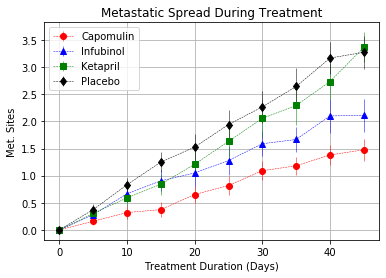

In [9]:
# Generate the Plot (with Error Bars)

plt.errorbar(change_avg_met.index, change_avg_met["Capomulin"],yerr=st_err_met["Capomulin"],label = "Capomulin", marker="o", color="red",ls='--',
                 linewidth=0.5)
plt.errorbar(change_avg_met.index, change_avg_met["Infubinol"],yerr=st_err_met["Infubinol"],label = "Infubinol", marker="^", color="blue",ls='--',
                 linewidth=0.5)
plt.errorbar(change_avg_met.index, change_avg_met["Ketapril"],yerr=st_err_met["Ketapril"],label = "Ketapril", marker="s", color="green",ls='--',
                 linewidth=0.5)
plt.errorbar(change_avg_met.index, change_avg_met["Placebo"],yerr=st_err_met["Placebo"],label = "Placebo", marker="d", color="black",ls='--',
                 linewidth=0.5)
    
plt.legend(loc='best')
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.grid(True)

# Save the Figure
plt.savefig("../GRADE_THIS/met_spread.png")
# Show the Figure
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_trial_combined = mouse_trial_combined.rename(columns={"Mouse ID":"Mouse Count"})
grouped_mouse = mouse_trial_combined.groupby(["Drug","Timepoint"]) ["Mouse Count"]
mouse_count = grouped_mouse.nunique()

# Convert to DataFrame
mouse_count_df = pd.DataFrame(mouse_count)
mouse_count_df = mouse_count_df.reset_index()

# Preview DataFrame
mouse_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
change_mouse = mouse_count_df.pivot(index="Timepoint", columns="Drug", values="Mouse Count")

# Preview that Reformatting worked
change_mouse.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


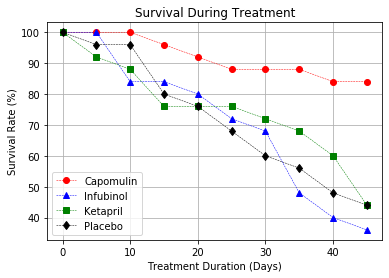

In [12]:
# Generate the Plot (Accounting for percentages) NEED TO CHANGE FOR PERCENTAGE
plt.plot(change_mouse.index, change_mouse["Capomulin"]/change_mouse["Capomulin"][0]*100,label = "Capomulin", marker="o", color="red",ls='--',
                 linewidth=0.5)
plt.plot(change_mouse.index, change_mouse["Infubinol"]/change_mouse["Infubinol"][0]*100,label = "Infubinol", marker="^", color="blue",ls='--',
                 linewidth=0.5)
plt.plot(change_mouse.index, change_mouse["Ketapril"]/change_mouse["Ketapril"][0]*100,label = "Ketapril", marker="s", color="green",ls='--',
                 linewidth=0.5)
plt.plot(change_mouse.index, change_mouse["Placebo"]/change_mouse["Placebo"][0]*100,label = "Placebo", marker="d", color="black",ls='--',
                 linewidth=0.5)
    
plt.legend(loc='best')
plt.title("Survival During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid(True)

#Save the Figure
plt.savefig("../GRADE_THIS/survival.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
perc_change = (change_avg_tumor.iloc[-1]/(change_avg_tumor.iloc[0])-1)*100

# Display the data to confirm
perc_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

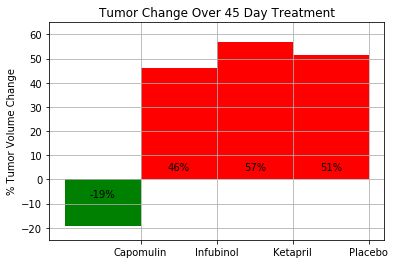

In [14]:
# Store all Relevant Percent Changes into a Tuple
perc_tup = (perc_change["Capomulin"],
           perc_change["Infubinol"],
           perc_change["Ketapril"],
           perc_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()

x_axis = np.arange(len(perc_tup))
width = 1

rectsp = ax.bar(x_axis[0],perc_tup[0],width,color="green")
rectsf = ax.bar(x_axis[1:4],perc_tup[1:4],width,color="red")


# Orient widths. Add labels, tick marks, etc. 
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")
ax.set_ylim(-25,65)
ax.set_xticks(x_axis + 0.5)
ax.set_xticklabels(("Capomulin","Infubinol","Ketapril","Placebo"))
ax.grid(True)

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height >0:
            label_pos = 3
        else:
            label_pos = -8
        ax.text(rect.get_x() + rect.get_width()/2.,label_pos,"%d%%" % int(height), ha="center", va="bottom")

# Call functions to implement the function calls
autolabel(rectsp)
autolabel(rectsf)

# Save the Figure
plt.savefig("../GRADE_THIS/tumor_change.png")

# Show the Figure
fig.show()

## Analysis

Based on the data, the drug Capomulin had the best results for treatment during the 45 days with an overall passing rating.  All the other drugs failed.
Capomulin’s survival rate over the treatment period was close to 100%
Capomulin showed significant shrinkage of the tumor when given while the other two drugs and the Placebo pretty much stayed in line and resulted in tumor growth.
With regards to the cancer metastasizing, Capomulin produced the lowest results of the 3 drugs and the Placebo.  
Infubinol has the worst survival rate over the 45 day treatment period.  However, it did not show a significant increase of tumor growth or metastasizing.  We might want to investigate other factor including long term use with this drug. Ketapril had the worst results scoring higher than the Placebo on both tumor growth and metastatic spreading.
